To Do:
- Do a round of fine-tuning of the entire model
- Add a base-line
    take the average from the training data and use it on the validation data, we want to improve this with our model


Using example from the following website:
https://keras.io/examples/vision/image_classification_from_scratch/

In [4]:
#First we load the following packages:
import os
import json
import numpy as np
import pandas as pd
import keras
#from keras import layers
import matplotlib.pyplot as plt
import tensorflow
#from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

image_location = '/Users/sarahguilliams/Desktop/Advanced Analytics in a Big Data World/Assignment2/images'

Trial 2, I think that we need to instead use Image data loading as explained here : https://keras.io/api/data_loading/image/
(so using keras.utils.image_dataset_from_directory)
https://machinelearningmastery.com/how-to-load-large-datasets-from-directories-for-deep-learning-with-keras/ 

In [5]:
# Load the json datafile
file_path = "dataset.json"

# Open the JSON file and load its contents
with open(file_path, 'r') as file:
    data = json.load(file)
data1 = pd.DataFrame(data)


# Select 10% of the games
num_selected_games = int(len(data1) * 0.1)
np.random.seed(0) #This is so that we get the same games when training the model.
selected_games = data1.sample(n=num_selected_games)
#print(selected_games) # selected 1468 games



# Extract game IDs and prices
game_ids = []
prices = []
for index, game in selected_games.iterrows():
    game_ids.append(game['appid'])
    prices.append(game['price'])

In [6]:
# Split data into training and validation sets based on games
#train_game_ids, test_game_ids, train_prices, test_prices = train_test_split(game_ids, prices, test_size=0.2, random_state=42)
#print(train_game_ids[:10])
train1_games, test_games = train_test_split(selected_games, test_size=0.2, random_state=42)
train_games, val_games = train_test_split(train1_games, test_size=0.2, random_state=42)
print(train_games[:10])

         appid     release                                              title  \
1875   2469330  2024-03-07  The Pirate Queen: A Forgotten Legend ft. Lucy Liu   
10836  2371470  2023-05-10  美少女ストリーマーの秘密恋愛 - Secret romance with streamer ...   
1563   2540060  2024-03-01                                           NodeLord   
5062   2634140  2023-10-31                                   Endoparasitic VR   
8859   1926270  2023-07-18                                         Bloodhound   
8744    690500  2023-07-20    In the Village of Grandfather: Summer,Sun,Heat.   
5613   2630810  2023-10-18                               3D PUZZLE - Building   
3132   2710390  2023-12-19                                 DANGER ZONE BOMBER   
6209   2608440  2023-10-02                                    Sunlight Scream   
1399   2762810  2024-02-29                                 Hidden Winter Cats   

        price        sentiment reviews percentage  \
1875     1649             None    None        NaN   
10

In [7]:
# Create a list of dictionaries for DataFrame
train_data = []
for index, game in train_games.iterrows():
    for screenshot in game['screenshots']:
        train_data.append({'screenshot': screenshot, 'price': game['price']})

# Create DataFrame
train_label_df = pd.DataFrame(train_data)

# Display the DataFrame
print(train_label_df)

# Do the same for the validation set
val_data = []
for index, game in val_games.iterrows():
    for screenshot in game['screenshots']:
        val_data.append({'screenshot': screenshot, 'price': game['price']})

# Create DataFrame
val_label_df = pd.DataFrame(val_data)

# Display the DataFrame
print(val_label_df)


# Do the same for the test set
# Create a list of dictionaries for DataFrame
test_data = []
for index, game in test_games.iterrows():
    for screenshot in game['screenshots']:
        test_data.append({'screenshot': screenshot, 'price': game['price']})

# Create DataFrame
test_label_df = pd.DataFrame(test_data)

# Display the DataFrame
print(test_label_df)

                                             screenshot  price
0     2469330_ss_1c362ed06d9ae1889b174d5b809a9c10698...   1649
1     2469330_ss_95990092080c4bafffb817c42abf48a6239...   1649
2     2469330_ss_cf8f557e3213af154d62be763caa274fd5d...   1649
3     2469330_ss_d06615dda5399d2eb423537c3f6fe32f815...   1649
4     2469330_ss_f579a2f809e879eec3537c60537843f6759...   1649
...                                                 ...    ...
8292  2240920_ss_38c4122975acd5334f4af4cf132ea7dcfbf...   1950
8293  2240920_ss_4a641bb1ceb2221b4636b5f7b0ddb9f203f...   1950
8294  2240920_ss_58e796b5e3f5bbb69d46bc3373d14c7f75d...   1950
8295  2240920_ss_6ffddde971aa99a15c090458d5e00ff5b28...   1950
8296  2240920_ss_e89887581aa429c2f2250b48cb3472f3240...   1950

[8297 rows x 2 columns]
                                             screenshot  price
0     1769060_ss_05f99919f16923296837f8793e4088168a3...   1479
1     1769060_ss_0829d256a914eb8af55f0c8a03c25668415...   1479
2     1769060_ss_2fe33d28ab9a5

With Keras 2.2.4 you can use flow_from_dataframe which solves what you want to do, allowing you to flow images from a directory for regression problems. You should store all your images in a folder and load a dataframe containing in one column the image IDs and in the other column the regression score (labels) and set class_mode='other' in flow_from_dataframe.

Here you can find an example where the images are in image_dir, the dataframe with the image IDs and the regression scores is loaded with pandas from the "train file"

Potentially add , horizontal_flip = True,
                                   fill_mode = "nearest", zoom_range = 0.2,
                                   width_shift_range = 0.2, height_shift_range=0.2,
                                   rotation_range=30) 
to image generator.

In [8]:
train_datagen = tensorflow.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, 
                                                                        rotation_range=45, horizontal_flip=True, vertical_flip=True)


train_generator = train_datagen.flow_from_dataframe(dataframe=train_label_df, directory=image_location, 
                                              x_col="screenshot", y_col="price", has_ext=True, 
                                              class_mode="other", target_size=(540, 960), 
                                              batch_size=50)

val_datagen = tensorflow.keras.preprocessing.image.ImageDataGenerator(rescale=1./255) 
val_generator = val_datagen.flow_from_dataframe(dataframe=val_label_df, directory=image_location, 
                                              x_col="screenshot", y_col="price", has_ext=True, 
                                              class_mode="other", target_size=(540, 960), 
                                              batch_size=50)

# for the test set
test_datagen = tensorflow.keras.preprocessing.image.ImageDataGenerator(rescale=1./255) 
# here we don't perform any transormations

test_generator = test_datagen.flow_from_dataframe(dataframe=test_label_df, directory=image_location, 
                                              x_col="screenshot", y_col="price", has_ext=True, 
                                              class_mode="other", target_size=(540, 960), 
                                              batch_size=50)


Found 7852 validated image filenames.
Found 1879 validated image filenames.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 445 invalid image filename(s) in x_col="screenshot". These filename(s) will be ignored.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 123 invalid image filename(s) in x_col="screenshot". These filename(s) will be ignored.
  warnings.warn(


Found 2402 validated image filenames.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 184 invalid image filename(s) in x_col="screenshot". These filename(s) will be ignored.
  warnings.warn(


Using transfer learning (using a pre-trained model)
https://keras.io/guides/transfer_learning/
Remove the top last layers so these can be trained on our data.
https://www.tensorflow.org/guide/keras/transfer_learning
https://www.tensorflow.org/tutorials/images/transfer_learning#create_the_base_model_from_the_pre-trained_convnets

In [9]:
from tensorflow.keras.applications import VGG16
base_model = tensorflow.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(540, 960, 3))

In [25]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential

# Freeze the base model
base_model.trainable = False

# Create a new model on top
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5), # to prevent overfitting
    Dense(1)
])

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
print("Model is compiled")

# Train model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=1,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)
print("Model is trained")


# Evaluate model
loss, mae = model.evaluate(test_generator)
print("Validation Mean Absolute Error:", mae)

print("Model is evaluated")

Model is compiled


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-03-25 17:22:48.905494: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8
2024-03-25 17:23:00.888503: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


In [10]:
base_model.summary()
#model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 540, 960, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 540, 960, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 540, 960, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 270, 480, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 270, 480, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 270, 480, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 135, 240, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 135, 240, 256)  │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 135, 240, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 135, 240, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 67, 120, 256)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 67, 120, 512)   │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 67, 120, 512)   │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 67, 120, 512)   │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 33, 60, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 33, 60, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 33, 60, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 33, 60, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 16, 30, 512)    │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

Give the predicted price for a game


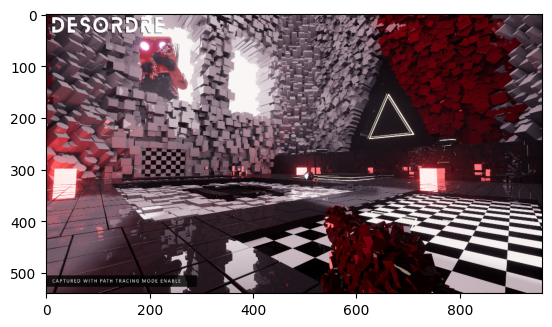

NameError: name 'model' is not defined

In [11]:
# Define the image location
filename = '2097490_ss_8cbd04bf288e050789f7da39345ecdd113cdabaa.1920x1080.jpg'

# Construct the full path to the image
image_path = os.path.join(image_location, filename)

# Load and display the image
img = keras.utils.load_img(image_path, target_size=(540, 960))
plt.imshow(img)
plt.show()

img_array = keras.utils.img_to_array(img)
img_array = keras.ops.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
print(predictions)



_________________________________________________________________________________________________________________________

In [12]:
pip freeze

absl-py==2.1.0
annotated-types==0.6.0
appnope==0.1.4
asttokens==2.4.1
astunparse==1.6.3
attrs==23.2.0
certifi==2024.2.2
charset-normalizer==3.3.2
cloudpickle==3.0.0
comm==0.2.1
contourpy==1.2.0
cycler==0.12.1
debugpy==1.8.1
decorator==5.1.1
dm-tree==0.1.8
executing==2.0.1
featuretools==1.30.0
flatbuffers==24.3.7
fonttools==4.49.0
gast==0.5.4
google-pasta==0.2.0
grpcio==1.62.1
h5py==3.10.0
holidays==0.43
htmlmin==0.1.12
idna==3.6
ImageHash==4.3.1
importlib_resources==6.1.2
ipykernel==6.29.2
ipython==8.22.1
jedi==0.19.1
Jinja2==3.1.3
joblib==1.3.2
jupyter_client==8.6.0
jupyter_core==5.7.1
keras==3.0.5
kiwisolver==1.4.5
libclang==16.0.6
llvmlite==0.42.0
Markdown==3.6
markdown-it-py==3.0.0
MarkupSafe==2.1.5
matplotlib==3.8.3
matplotlib-inline==0.1.6
mdurl==0.1.2
missingno==0.5.2
ml-dtypes==0.3.2
multimethod==1.11.2
namex==0.0.7
nest-asyncio==1.6.0
networkx==3.2.1
numba==0.59.0
numpy==1.26.4
opt-einsum==3.3.0
packaging==23.2
pandas==2.2.1
pandas-profiling==3.2.0
parso==0.8.3
pexpect==4.9.0
